# Partial Least Squares Regression 

* The Partial Least Squares Regression model is established by reducing the number of independent variables to components that do not have multiple linear connection problems.


* PLS is a **supervised** dimennsion reduction procedure


* PCR is a **unsupervised** dimennsion reduction procedure


* In PLS model, we select the independent variables in the model by taking into  accountthe dependent variable .



* In PCR model, we select the independent variables in the model among themselves, **without** taking into account the dependent variable



* Both models have a tunnning parameter. it is the number of independent variables.



* CV (cross-vaaldtion) method is used to determine the optimum number of components (number of independent variables).



## 1-)Data preprocessing

In [1]:
import pandas as pd
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)


In [2]:
from sklearn.model_selection import train_test_split

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

print("X_train", X_train.shape)

print("y_train",y_train.shape)

print("X_test",X_test.shape)

print("y_test",y_test.shape)

training = df.copy()

print("training", training.shape)

X_train (197, 19)
y_train (197,)
X_test (66, 19)
y_test (66,)
training (263, 20)


## 2-)Model

In [4]:
from sklearn.cross_decomposition import PLSRegression, PLSSVD


**2-1) Model with the  default  number of component (independent variabales)**

In [5]:
pls_model = PLSRegression().fit(X_train, y_train)

In [6]:
pls_model.coef_

array([[ 35.32916493],
       [ 48.83425857],
       [ 18.50240933],
       [ 39.28117603],
       [ 30.59952998],
       [ 40.03398345],
       [ 16.85990516],
       [ 28.22289896],
       [ 32.73784993],
       [ 22.00875744],
       [ 33.60903032],
       [ 30.39402522],
       [ 25.73279799],
       [ 54.98835148],
       [  6.56590871],
       [ -0.90894359],
       [ 17.60903423],
       [-37.24246339],
       [ 14.69680385]])

**2-2) Model with  n_components=6**

In [7]:
pls_model1 = PLSRegression(n_components=6).fit(X_train, y_train)

In [8]:
pls_model1.coef_

array([[-108.74143193],
       [ 197.6386967 ],
       [  22.57338481],
       [  26.52768741],
       [ -25.67952167],
       [  54.16363009],
       [ -25.89997437],
       [   5.36637756],
       [  89.44665343],
       [  26.79039104],
       [ 102.43239418],
       [  68.82932424],
       [ -61.11470635],
       [  94.44121847],
       [  26.38215013],
       [ -45.01850138],
       [  77.17773908],
       [ -35.85447586],
       [ -45.66863853]])

**2-3) Model with  n_components=4**

In [9]:
pls_model2 = PLSRegression(n_components=4).fit(X_train, y_train)

In [10]:
pls_model2.coef_

array([[ 1.51822441e+01],
       [ 6.46280265e+01],
       [ 3.72160940e-01],
       [ 3.43830155e+01],
       [ 1.10796162e+01],
       [ 3.95673608e+01],
       [ 1.59745182e+01],
       [ 3.02727875e+01],
       [ 4.47393945e+01],
       [ 1.73994899e+01],
       [ 4.63811429e+01],
       [ 3.56787668e+01],
       [ 2.02822479e+01],
       [ 8.83641653e+01],
       [ 2.83172614e+00],
       [-2.02100793e+01],
       [ 1.87681900e+01],
       [-6.35511136e+01],
       [ 5.38896436e-02]])

* As you can see, the coefficient of the independent variables is different depending on the number of independent variables used in the models.


 * We will find the optimum number of independent variables with model tuning 

 ## 3-)Prediction

* We predict the values by using Model with n_components=6

In [11]:
X_train.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
183,328.0,91.0,12.0,51.0,43.0,33.0,2.0,342.0,94.0,12.0,51.0,44.0,33.0,145.0,59.0,8.0,1,0,1
229,514.0,144.0,0.0,67.0,54.0,79.0,9.0,4739.0,1169.0,13.0,583.0,374.0,528.0,229.0,453.0,15.0,1,0,1
286,593.0,152.0,23.0,69.0,75.0,53.0,6.0,2765.0,686.0,133.0,369.0,384.0,321.0,315.0,10.0,6.0,0,1,0
102,233.0,49.0,2.0,41.0,23.0,18.0,8.0,1350.0,336.0,7.0,166.0,122.0,106.0,102.0,132.0,10.0,0,0,0
153,341.0,95.0,6.0,48.0,42.0,20.0,10.0,2964.0,808.0,81.0,379.0,428.0,221.0,158.0,4.0,5.0,1,1,1


In [12]:
pls_model.predict(X_train)[0:10]


array([[344.91941493],
       [848.87070769],
       [692.93622642],
       [185.56577984],
       [435.49196077],
       [987.49530026],
       [120.63097106],
       [289.9263406 ],
       [663.41886918],
       [817.90486641]])

In [13]:
y_pred = pls_model1.predict(X_train)

In [14]:
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
import numpy as np

In [16]:
np.sqrt(mean_squared_error(y_train, y_pred))# Training error before model tuning

298.0184320581615

In [17]:
r2_score(y_train, y_pred)

0.5512193616082298

In [18]:
y_pred1= pls_model1.predict(X_test)

In [19]:
np.sqrt(mean_squared_error(y_test, y_pred1))# test ERROR before model tuning

370.20535521687447

## 4-)Model tuning

We will find the optimum number of independent variables with model tuning 

In [20]:
from sklearn import model_selection

In [21]:
cv_10 = model_selection.KFold(n_splits=10, 
                              shuffle=True, 
                              random_state=1)

* By using cros validation, we will find the smallest traning error and determine the number of indpendent variables.



* **model_selection.KFold** ==== >> We created the cross valdation method.


* **n_splits=10**===>> we dividec into  training set 10 pieces .It aims to find the training error by leaving one piece out time.


* **shuffle=True**===>> take  observation  values randomly  in the training set

**4.1-) Determine the smallest training error and optimum number of independent variables**

In [22]:
X_train.shape[1]

19

In [23]:
RMSE = [] # Root Mean Square Error

In [24]:
from sklearn.model_selection import cross_val_score

In [25]:
for i in np.arange(1, X_train.shape[1] + 1):
    pls = PLSRegression(n_components=i)
    score = np.sqrt(-1*cross_val_score(pls, X_train, y_train, cv=cv_10, scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

In [26]:
RMSE

[332.98747808484296,
 332.3639761713549,
 334.73002074148644,
 336.86371974851266,
 347.34060450905895,
 360.1409559725809,
 362.4942366122575,
 353.30253313512407,
 347.45013428868964,
 346.1443943498622,
 344.2198021098176,
 343.0331614260373,
 342.52833944874055,
 347.55117349659906,
 347.8410151938682,
 347.9209315785898,
 348.6024335798608,
 348.5116080418639,
 353.37050529908515]

**4-2) RMSE VISUALIZATION**

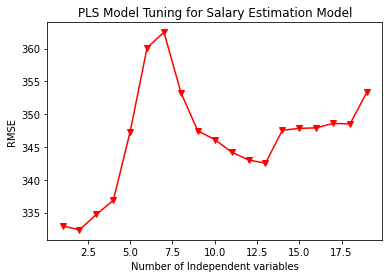

In [27]:
import matplotlib.pyplot as plt
plt.plot(np.arange(1, X_train.shape[1] + 1), np.array(RMSE), '-v', c = "r")
plt.xlabel('Number of Independent variables')
plt.ylabel('RMSE')
plt.title('PLS Model Tuning for Salary Estimation Model');

* If we get 2 as the number of independent variables ,We wil get the smallest value of RMSE



* Therefore we will create final model after model tuning process by using 2 indpendent varibales (n_components = 2)

In [28]:
pls_model3 = PLSRegression(n_components = 2).fit(X_train, y_train)

In [29]:
y_pred3 = pls_model3.predict(X_test)

In [30]:
np.sqrt(mean_squared_error(y_test, y_pred3)) # test error after model tuning

398.09956327448526

In [31]:
pls_model3.coef_

array([[ 35.32916493],
       [ 48.83425857],
       [ 18.50240933],
       [ 39.28117603],
       [ 30.59952998],
       [ 40.03398345],
       [ 16.85990516],
       [ 28.22289896],
       [ 32.73784993],
       [ 22.00875744],
       [ 33.60903032],
       [ 30.39402522],
       [ 25.73279799],
       [ 54.98835148],
       [  6.56590871],
       [ -0.90894359],
       [ 17.60903423],
       [-37.24246339],
       [ 14.69680385]])